<a href="https://colab.research.google.com/github/qt19623/qt19623.github.io/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycountry_convert

In [ ]:
pip install pycountry

In [182]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import pycountry_convert as pc

In [184]:
import json

In [185]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/advanced analysis'

In [186]:
path='/content/drive/My Drive/Colab Notebooks/advanced analysis'

In [187]:
os.chdir(path)

In [188]:
stocks=pd.read_csv('wbrealgdp.csv')
stocks.head(2)

,Country,Series,Year,NY.GDP.PCAP.CD,country3
0,Afghanistan,GDP per capita (current US$),2016,512.012778,AFG
1,Afghanistan,GDP per capita (current US$),2017,516.679862,AFG


real gdp data from world bank

In [189]:
country3 = stocks['country3'].values
realgdp= stocks['NY.GDP.PCAP.CD'].values
year=stocks['Year'].values

In [190]:
df = pd.DataFrame({"country":country3, "year":year, "realgdp":realgdp})


In [191]:
df = df[df.year == 2018]

In [192]:
df

,country,year,realgdp
2,AFG,2018,485.668419
7,ALB,2018,5287.663694
12,DZA,2018,4142.018558
17,ASM,2018,11521.609780
22,AND,2018,41791.969840
...,...,...,...
1047,VNM,2018,2566.447487
1052,VIR,2018,36448.257490
1057,YEM,2018,758.145242
1062,ZMB,2018,1516.368371


In [193]:
stocks2=pd.read_csv('oecdmathpisa.csv')
stocks2.head(2)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PISAMATH,TOT,MEANSCORE,A,2003,524,NaN
1,AUS,PISAMATH,TOT,MEANSCORE,A,2006,520,NaN


pisa mathematics data from OECD

In [194]:
location=stocks2['LOCATION'].values
pisamath=stocks2[stocks2.columns[6]]
time=stocks2['TIME'].values

In [195]:
df1 = pd.DataFrame({"year":time, "country":location, "pisamath":pisamath})

In [196]:
df1 = df1[df1.year == 2018]

In [197]:
df1

,year,country,pisamath
5,2018,AUS,491
10,2018,AUT,499
16,2018,BEL,508
22,2018,CAN,512
28,2018,CZE,499
34,2018,DNK,509
40,2018,FIN,507
46,2018,FRA,495
52,2018,DEU,500
58,2018,GRC,451


In [198]:
finaldf=pd.merge(df,df1,on='country',how='outer')

In [199]:
finaldf

,country,year_x,realgdp,year_y,pisamath
0,AFG,2018.0,485.668419,NaN,NaN
1,ALB,2018.0,5287.663694,NaN,NaN
2,DZA,2018.0,4142.018558,NaN,NaN
3,ASM,2018.0,11521.609780,NaN,NaN
4,AND,2018.0,41791.969840,NaN,NaN
...,...,...,...,...,...
210,VIR,2018.0,36448.257490,NaN,NaN
211,YEM,2018.0,758.145242,NaN,NaN
212,ZMB,2018.0,1516.368371,NaN,NaN
213,ZWE,2018.0,1254.642265,NaN,NaN


In [200]:
finaldf=finaldf.dropna()

In [201]:
finaldf

,country,year_x,realgdp,year_y,pisamath
10,AUS,2018.0,57180.779400,2018.0,491.0
11,AUT,2018.0,51461.433220,2018.0,499.0
18,BEL,2018.0,47519.553100,2018.0,508.0
26,BRA,2018.0,9151.381732,2018.0,384.0
35,CAN,2018.0,46454.743390,2018.0,512.0
39,CHL,2018.0,15888.144360,2018.0,417.0
41,COL,2018.0,6729.583332,2018.0,391.0
45,CRI,2018.0,12485.423900,2018.0,402.0
51,CZE,2018.0,23419.735610,2018.0,499.0
52,DNK,2018.0,61591.928870,2018.0,509.0


In [202]:

x =finaldf.realgdp
y =finaldf.pisamath
a, b = np.polyfit(x, y, 1)

Text(0, 0.5, 'pisamath')

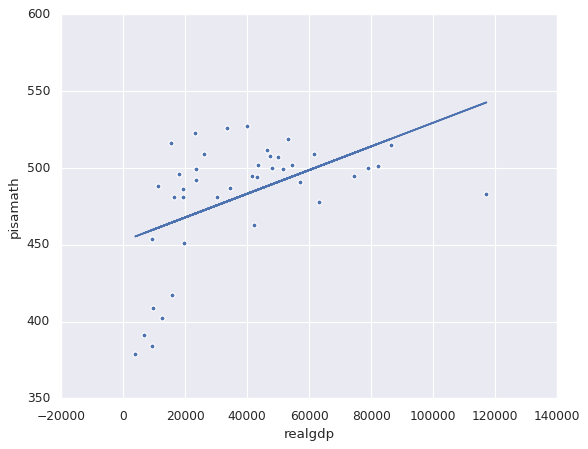

In [203]:
plt.scatter(x, y)
plt.plot(x, a*x+b)
plt.xlabel('realgdp')
plt.ylabel('pisamath')

In [204]:
finaldf.to_csv('mathgdp.csv')

In [205]:
plt.savefig('fig1.png', dpi=300)

<Figure size 640x480 with 0 Axes>